# DSfIOT: Machine Learning End to End Tutorial 


## Aims and Structure of the session


### Aims

* Provide an overview and end-to-end implementation of a machine learning problem, using supervised learning methods 
* Provide code and exercises to develop learning 
* Provide links to further reading and ideas for future exercises that enable you to continue learning
* We are limited on time, and therefore *won't* cover:
  * *Machine Learning Theory* in any great detail, other than to enable you to understand the code we are implementing 
  * *Exploratory Data Analysis*, which is often undertaken prior to building models to understand the data and what features might be useful in our model
  * *Feature Engineering*, which is about developing new features from the data that might better serve how our model predicts output variable
  * *Visualisations* of the modelling and data, which can be helpful in understanding model performance (and are also used for exploratory data analysis)
* We can look to cover these topics at future sessions or via Slack with the same or a different dataset - it would be good to understand what your priorities are

### Structure of session 

* **Part 1: Machine Learning:** 
  1. Introduction to ML and ML approach, Introduction to problem
  2. Load data, preprocess and split data
  3. Build model,  train and predict 
  4. Refine model 

* **Part 2: Deep Learning** 
  1. Introduction to Deep Learning and Keras 
  2. Build DL model, train and predict 
  3. Refine model 
 

## Part 1: Machine Learning 


### 1. Introduction to Machine Learning, Machine Learning Approach and Introduction to the problem 

#### 1.1 Introduction to Machine Learning
**Aim:** 
* To introduce the concept of machine learning 
* Introduce the different types of machine learning

---


**Machine Learning**
* From ['Python Data Science Handbook'](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlass:

*Machine learning is often categorized as a subfield of artificial intelligence, but I find that categorization can often be misleading at first brush. The study of machine learning certainly arose from research in this context, but in the data science application of machine learning methods, it’s more helpful to think of **machine learning as a means of building models of data**.*


*Fundamentally, **machine learning involves building mathematical models to help understand data**. “Learning” enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be “learning” from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.*

* Chapter 2 of *Introduction to Statistical Learning* (available free [here](http://www-bcf.usc.edu/~gareth/ISL/)) has an excellent overview of topics relating to Machine Learning.


**Different types of Machine Learning**

* *Supervised learning* is about modeling the relationship between features of data and a label associated with the data. Once this model is determined, it can be used to apply labels to new, unknown data. 
* Supervised learning can either be a *classification* task (where our labels are in discrete categories) or *regression* task (where our labels are continuous quantities). 
* *Unsupervised learning* models the features of a dataset without reference to any label. These models include tasks such as clustering and dimensionality reduction. We can use unsupervised learning rechnqiues to preprocess data prior to running supervised learning models. 
* *Semi-supervised learning* can also be used when we only have incomplete labels for our data.
* We will cover *deep learning* on Day 2, but it can be thought of as a way of implementimg  *supervised*, *unsupervised* and *semi-supervised* learning. 


#### 1.2 Approaching an ML problem 
**Aim:** 
* To introduce an approach to tackling a machine learning problem, which we will then follow in this tutorial. 

---

**Outline approach** 

* From '*Python Machine Learning*', by Sebastian Raschka (see [here](https://sebastianraschka.com/books.html) for details)

![alt text](https://www.safaribooksonline.com/library/view/python-machine-learning/9781787125933/graphics/B07030_01_09.jpg)



#### 1.3 Introduction to the problem 
**Aim:** 
* To introduce how we might structure problem statements for machine learning problems
* Determine how we are going to approach this problem 


---
* A problem statement for a machine learning problem might include:
  * a problem statement, defining the problem(s) that we are trying to solve
  * the dataset and any other inputs we might be able to draw upon (e.g. domain knowledge)
  * a solution statement, setting out how we intend to solve the problem using the data and other inputs available 
  * whether we have a benchmark model to compare our work against
  * the evaluation metrics we intend to use to score our models
  * we might also define upfront what our target variable is, what platform or hardware considerations need to be taken into account, and any risks we might have to success
  
* For this tutorial, we have a dataset provided, which is covered in more detail below.

**Black Friday Dataset**
* We will work on the Black Friday dataset in this article. The dataset and problem are from Kaggle
also adapted from this [post](https://medium.com/analytics-vidhya/build-your-first-neural-network-model-on-a-structured-dataset-using-keras-d9e7de5c6724)
* We have been provided with various information about customer demographics (age, gender, marital status, city_type, stay_in_current_city) and product details (product_id and product category). 

Below is the data dictionary (`Variable`          |                  *Definition*)

* `User_ID`       |    *User ID*

* `Product_ID` |   *Product ID*
    
* `Gender` |   *Sex of User*

* `Age` |  *Age in bins*

* `Occupation` |   *Occupation ( Masked)*

* `City_Category` |    *Category of the city (A, B, C)*

* `Stay_In_Current_City_Years` |  *Number of years stay in current city*

* `Marital_Status` |  *Marital Status*

* `Product_Category_1` |   *Product Category (Masked)*

* `Product_Category_2` |  *Product may belong to other category also (Masked)*

* `Product_Category_3` |  *Product  may belong to other category also (Masked)*

* `Purchase` |  *Purchase Amount*


**EXERCISE 1.3:** Can you define the problem statement and determine the target variable? What type of machine learning problem is this?

---

**ANSWER:** Inferring which features primarily determine the target, which is Purchase, and forming a model for prediction. This is a supervised learning problem. Using regression to determine the inference and prediction.





### 2. Load, preprocess and split the data
**Aim:** 
* To undersand the dataset better
* To understand why and how we preprocess the data in preparation for it being modelled 
* To understand why and how we split the data into training and testing sets


#### 2.1 Loading the data 

  


In [1]:
import numpy as np
import pandas as pd

# Read Necessary files - because we are loading a provided dataset, we are loading both files 
fullData = pd.read_csv("https://raw.githubusercontent.com/dsiot/wearables/master/course/bf_train.csv")

In [2]:
#from jupyterthemes import jtplot
#jtplot.style()

##### Get a feel for the data 

In [3]:
# here we can see the top n lines of the dataset:
rows = 5
print("Top {} lines of dataset:".format(rows))
fullData.head(rows)

Top 5 lines of dataset:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# size of the loaded data
from sys import getsizeof

In [5]:
getsizeof(fullData)

209465388

In [6]:
# in kB
getsizeof(fullData)/1024

204556.04296875

In [7]:
# lets get the shape of the data 
print('The dataset has {} entries'.format(fullData.shape[0]))
print('The dataset has {} columns'.format(fullData.shape[1]))

The dataset has 550068 entries
The dataset has 12 columns


In [8]:
# understand what values are missing - here we sum the null values for each column 
# isnull returns a boolean, which we sum
fullData.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
fullData.notnull().sum()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1            550068
Product_Category_2            376430
Product_Category_3            166821
Purchase                      550068
dtype: int64

In [10]:
# percentage of entries per column type 
print('Percentage of Not Null Values per column/feature:')
np.around((fullData.notnull().sum() / len(fullData)*100), decimals=1)

Percentage of Not Null Values per column/feature:


User_ID                       100.0
Product_ID                    100.0
Gender                        100.0
Age                           100.0
Occupation                    100.0
City_Category                 100.0
Stay_In_Current_City_Years    100.0
Marital_Status                100.0
Product_Category_1            100.0
Product_Category_2             68.4
Product_Category_3             30.3
Purchase                      100.0
dtype: float64

##### Get a feel for the target variable

In [11]:
# code regarding purchase column
fullData['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

**EXERCISE 2.1:** Given our exploration of the data above, do you feel confident there is suitable data to solve your problem statement? Do you have any thoughts about whether some features are better than others? 

---

**ANSWER:** UserID and ProductID not relevant. Product categories 2 and 3 have several Null values. Imputation is necessary here.



In [12]:
# Look at Correlation Matrix
fullData.drop(labels = ['User_ID', 'Product_ID'], axis=1).corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


#### 2.2 Preprocessing the data
* We proprocess the data to ensure it is a suitable state for modelling. The sort of things that we do to preprocess the data includes:
  * *Dealing with missing values*, where we identify what, if, any missing data we have and how to deal with it. For example, we may replace missing values with the mean value for that feature, or by the average of the neighbouring values. 
    * `pandas` has a number of options for filling in missing data that is worth exploring
    * We can also use `k-nearest neighbour`to help us predict what the missing values should be, or `sklearn Imputer` function (amongst other ways)
  * *Treat categorical values*, by converting them into a numerical representation that can be modelled.
    * There are a number of different ways to do this in `sklearn` and `pandas`
  * *Normalise the data*, for example by ensuring the data is, for example all on the scale (such as within two defined values); normally distributed; has a zero-mean, etc. This is sometimes necessary for the ML models to work, and can also help speed up the time it takes for the models to run.  
    * Again, `sklearn` and `pandas` have in-built functions to help you do this.

##### Prepare for preprocessing

In [13]:
# create a new version of dataset
fullData_preprocessed = fullData.copy()

# check that all is well
print("Check that the copy dataset has the same shape:")
print('The dataset copy has {} entries'.format(fullData.shape[0]))
print('The dataset copy has {} columns'.format(fullData.shape[1]))

Check that the copy dataset has the same shape:
The dataset copy has 550068 entries
The dataset copy has 12 columns


In [14]:
fullData_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [15]:
#Identifying ID, Categorical, and numerical data, which we will treat differently 
ID_col = ['User_ID','Product_ID']
cat_cols= ['Gender','Age','City_Category','Stay_In_Current_City_Years']
num_cols= ['Marital_Status','Occupation','Product_Category_1','Product_Category_2','Product_Category_3']

# Combined numerical and Categorical variables
# num_cat_cols = num_cols+cat_cols

##### Alternate approach

In [16]:
## here is an alternative to manually defining the columns.
# lets take a look at the data types of the columns
fullData_preprocessed.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [17]:
# here we can use a list comprehension to create a list of all the object columns
cat_cols_alt = [f for f in fullData_preprocessed.columns if fullData_preprocessed.dtypes[f] == 'object']
cat_cols_alt

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [18]:
# and do the same for number cols
num_cols_alt = [f for f in fullData_preprocessed.columns if fullData_preprocessed.dtypes[f] != 'object']
num_cols_alt

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [19]:
## this is the same as doing a for loop
## here i have added an extra condition so that we 

# create empty list
cat_cols_alt2 = []
num_cols_alt2 = []
ID_cols_alt2 = []

# create for loop
for cols in fullData_preprocessed.columns:
  if fullData_preprocessed.dtypes[cols] == 'object':
    if cols != 'Product_ID':
      cat_cols_alt2.append(cols)
  elif fullData_preprocessed.dtypes[cols] != 'object':
    if cols !=  'User_ID':
      num_cols_alt2.append(cols)
  if cols not in cat_cols_alt2 and cols not in num_cols_alt2:
        ID_cols_alt2.append(cols)

print(cat_cols_alt2)
print(num_cols_alt2)
print(ID_cols_alt2)

## it may be easier to define the columns manually!

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
['User_ID', 'Product_ID']


##### Dealing with Missing Values

In [20]:
# Look at data before
fullData_preprocessed[num_cols][0:10]

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3
0,0,10,3,NaN,NaN
1,0,10,1,6.0,14.0
2,0,10,12,NaN,NaN
3,0,10,12,14.0,NaN
4,0,16,8,NaN,NaN
5,0,15,1,2.0,NaN
6,1,7,1,8.0,17.0
7,1,7,1,15.0,NaN
8,1,7,1,16.0,NaN
9,1,20,8,NaN,NaN


In [21]:
# Impute numerical missing values with 0 instead of mean
fullData_preprocessed[num_cols] = fullData_preprocessed[num_cols].fillna(0)

In [22]:
# Look at what we have done
fullData_preprocessed[num_cols][0:10]

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3
0,0,10,3,0.0,0.0
1,0,10,1,6.0,14.0
2,0,10,12,0.0,0.0
3,0,10,12,14.0,0.0
4,0,16,8,0.0,0.0
5,0,15,1,2.0,0.0
6,1,7,1,8.0,17.0
7,1,7,1,15.0,0.0
8,1,7,1,16.0,0.0
9,1,20,8,0.0,0.0


**EXERCISE:** What are the advantages and disadvanatges of the methods used here to deal with missing data? Are you aware of other approaches that might be better suited to this dataset?

---

**ANSWER:** Replacing the null values with 0 seems apt in this case. However, without domain knowledge, this could turn out to not be correct. Other values which can be used to impute are mean, median, mode. Again, having domain knowledge will help in determining the most appropriate method.



##### Normalise the data

In [23]:
## we normalise the data by dividing each value in the column by the max value of that column - a way of resclaing the data between (0,1) and keeping their relative weights 
## lets see what our denominator is 
fullData_preprocessed[num_cols].max()

Marital_Status         1.0
Occupation            20.0
Product_Category_1    20.0
Product_Category_2    18.0
Product_Category_3    18.0
dtype: float64

In [24]:
## pandas is built on numpy and therefore we can perform this operation on each of the columns as follows
fullData_preprocessed[num_cols] = fullData_preprocessed[num_cols]/fullData_preprocessed[num_cols].max()

In [25]:
# and lets check out the cols now
fullData_preprocessed[num_cols][0:10]

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,0.50,0.15,0.000000,0.000000
1,0.0,0.50,0.05,0.333333,0.777778
2,0.0,0.50,0.60,0.000000,0.000000
3,0.0,0.50,0.60,0.777778,0.000000
4,0.0,0.80,0.40,0.000000,0.000000
5,0.0,0.75,0.05,0.111111,0.000000
6,1.0,0.35,0.05,0.444444,0.944444
7,1.0,0.35,0.05,0.833333,0.000000
8,1.0,0.35,0.05,0.888889,0.000000
9,1.0,1.00,0.40,0.000000,0.000000


In [26]:
# and look at the min and max values after the normalise operation
print(fullData_preprocessed[num_cols].max())
print(fullData_preprocessed[num_cols].min())

Marital_Status        1.0
Occupation            1.0
Product_Category_1    1.0
Product_Category_2    1.0
Product_Category_3    1.0
dtype: float64
Marital_Status        0.00
Occupation            0.00
Product_Category_1    0.05
Product_Category_2    0.00
Product_Category_3    0.00
dtype: float64


##### Treat Categorical Values

In [27]:
# see dataset after treating categorical variables
fullData_preprocessed[cat_cols][0:10]

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,0-17,A,2
1,F,0-17,A,2
2,F,0-17,A,2
3,F,0-17,A,2
4,M,55+,C,4+
5,M,26-35,A,3
6,M,46-50,B,2
7,M,46-50,B,2
8,M,46-50,B,2
9,M,26-35,A,1


In [28]:
#use label encoders for categorical features
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    # instantiate Label Encoder, which encodes labels with value between 0 and n_classes-1 
    number = LabelEncoder()
    # fit_transform fit label encoder and return encoded labels. Here we updated the cat_cols with the new labels
    fullData_preprocessed[col] = number.fit_transform(fullData_preprocessed[col])#.astype('str'))

In [29]:
# see dataset after treating categorical variables
fullData_preprocessed[cat_cols][0:10]

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,0,0,0,2
1,0,0,0,2
2,0,0,0,2
3,0,0,0,2
4,1,6,2,4
5,1,2,0,3
6,1,4,1,2
7,1,4,1,2
8,1,4,1,2
9,1,2,0,1


##### Take a view of dataset after preprocessing

In [30]:
fullData_preprocessed.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,0.5,0,2,0.0,0.15,0.000000,0.000000,8370
1,1000001,P00248942,0,0,0.5,0,2,0.0,0.05,0.333333,0.777778,15200
2,1000001,P00087842,0,0,0.5,0,2,0.0,0.60,0.000000,0.000000,1422
3,1000001,P00085442,0,0,0.5,0,2,0.0,0.60,0.777778,0.000000,1057
4,1000002,P00285442,1,6,0.8,2,4,0.0,0.40,0.000000,0.000000,7969


In [31]:
# percentage of entries per column type 
print('Percentage of Not Null Values per column/feature after preprocessing:')
np.around((fullData_preprocessed.notnull().sum() / len(fullData_preprocessed)*100), decimals=1)

Percentage of Not Null Values per column/feature after preprocessing:


User_ID                       100.0
Product_ID                    100.0
Gender                        100.0
Age                           100.0
Occupation                    100.0
City_Category                 100.0
Stay_In_Current_City_Years    100.0
Marital_Status                100.0
Product_Category_1            100.0
Product_Category_2            100.0
Product_Category_3            100.0
Purchase                      100.0
dtype: float64

In [32]:
# and finally, we need to drop redudant ID columns
fullData_preprocessed.drop(ID_col,axis=1, inplace=True)

In [33]:
# and a check on the different datatypes we now have 
fullData_preprocessed.dtypes

Gender                          int64
Age                             int64
Occupation                    float64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [34]:
# summarise the dataset
fullData_preprocessed.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,2.496430,0.403835,1.042640,1.858418,0.409653,0.270214,0.374191,0.213441,9263.968713
std,0.431205,1.353632,0.326133,0.760211,1.289443,0.491770,0.196811,0.345305,0.347262,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,12.000000
25%,1.000000,2.000000,0.100000,0.000000,1.000000,0.000000,0.050000,0.000000,0.000000,5823.000000
50%,1.000000,2.000000,0.350000,1.000000,2.000000,0.000000,0.250000,0.277778,0.000000,8047.000000
75%,1.000000,3.000000,0.700000,2.000000,3.000000,1.000000,0.400000,0.777778,0.444444,12054.000000
max,1.000000,6.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,23961.000000


In [35]:
# Correlation Matrix
fullData_preprocessed.corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.060346
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.061914
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,0.052288,0.288501,1.000000


#### 2.2 Split the data into training and testing sets 
* In order to train our model and see how well it performs, we need to split our data into training and testing sets.
* We can then train our model on the training set, and test how well it has generalised to the data on the test set.
* There are a number of options for how we can split the data, and for what proportion of our original data we set aside for the test set.


In [36]:
# here we need to drop our target variable from the X dataset
X = fullData_preprocessed.drop(['Purchase'],axis=1)

# get our target variable
y = fullData_preprocessed['Purchase']

In [37]:
print ('X: ', X.shape)
print ('y: ', y.shape)

X:  (550068, 9)
y:  (550068,)


In [38]:
# 
from sklearn.model_selection import train_test_split 
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features: ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of datapoints:  385047
Number of features:  9


Test Set:
Number of datapoints:  165021
Number of features:  9


**EXERCISE 2.2:**  Read the documentation for the `train_test_split` function [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and add comments to the code above to improve your understanding 

---

**ANSWER:** Other parameters are train_size (optional) to complement the test_size parameter. In case of classification, stratify can used so that both train and test size have equal distribution of classes. Shuffle is set to True by default.



### 3. Build Model, train and predict 
**Aim:** 
* To build and compare different machine learning models
* To understand the steps required to define, train and use a model to predict values
* To introduce the idea of evaluation metrics for assessing how well a model performs


---
* Building a model in `sklearn` involves:
  * defining / instantiating the model we want to use and its parameters
  * fitting the model we have developed to our training set 
* We can then use the model to predict scores against our test set and assess how good it is
* To do this, we need to define an evaluation metric. There are a number of different options, and they differ for both regression and classification problems. This score will be what we use to select our best model, and the best parameters. 


#### 3.1 Build a baseline model

In [40]:
# import model from sklearn
from sklearn.linear_model import LinearRegression

# instantiate model
baseline = LinearRegression()

In [41]:
fullData_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null float64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null float64
Product_Category_1            550068 non-null float64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(5), int64(5)
memory usage: 42.0 MB


In [42]:
# fit model - here we are training our model on our split data, but just the training set
baseline = baseline.fit(X_train, y_train)
baseline

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
# given our fitted model, how well will it perform - first step, import metrics 
from sklearn import metrics  

# create a prediction of the Purchase value on a new set of input variables, using our model 
predict_lr = baseline.predict(X_test)

# get a score by comparing our predict against actual. We get the square root of the MSE score to give us RSME
score_lr = np.sqrt(metrics.mean_squared_error(y_test,predict_lr))

# print out the score 
print('RMSE score for {} is:'.format(baseline.__class__.__name__),np.round((score_lr), decimals=2))

RMSE score for LinearRegression is: 4627.78


In [44]:
X_train.shape

(385047, 9)

#### 3.2 Build a model with Random Forest

In [45]:
#import necessary libraries to build model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_estimators=10, max_features="log2", max_depth=15)

# fit model
rf = rf.fit(X_train, y_train)

# this method also gives us the parameters of the model fit to the data 
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [46]:
# create a prediction of the Purchase value on a new set of input variables, using our model 
predict_rf = rf.predict(X_test)

# get a score by comparing our predict against actual. We get the square root of the MSE score to give us RSME
score_rf = np.sqrt(metrics.mean_squared_error(y_test,predict_rf))

# print out the score 
print('RMSE score for {} is:'.format(rf.__class__.__name__),np.round((score_rf), decimals=2))

RMSE score for RandomForestRegressor is: 3015.34


**EXERCISE 3.2:** sklearn models have a number of different methods and attributes associated with them. Look up and call some of the methods and attributes associated with the [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

---

**ANSWER:**



In [47]:
# R2 determination

print('R^2 of training data: %0.3f '%rf.score(X_train, y_train))

R^2 of training data: 0.684 


In [48]:
print('R^2 of test data: %0.3f '%rf.score(X_test, y_test))

R^2 of test data: 0.639 


In [49]:
## code here for using methods and attributes  
rf.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=15, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=272711293, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=15, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1238186903, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=15, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1520324631, splitter='best'),
 DecisionTreeRegressor(cri

In [50]:
rf.feature_importances_

array([0.0044081 , 0.01615053, 0.02205557, 0.00889748, 0.01421785,
       0.0047187 , 0.71420325, 0.10832458, 0.10702394])

In [51]:
fullData_preprocessed.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [52]:
pd.Series(rf.feature_importances_, index =X.columns)

Gender                        0.004408
Age                           0.016151
Occupation                    0.022056
City_Category                 0.008897
Stay_In_Current_City_Years    0.014218
Marital_Status                0.004719
Product_Category_1            0.714203
Product_Category_2            0.108325
Product_Category_3            0.107024
dtype: float64

In [53]:
rf.n_features_

9

In [54]:
rf.n_outputs_

1

In [55]:
pd.DataFrame(data = np.transpose([y_train[:10], rf.predict(X_train[:10])]), columns = ['True','Prediction'])

,True,Prediction
0,3886.0,7104.748141
1,12148.0,12656.287740
2,8054.0,7680.370339
3,4000.0,11840.541076
4,13701.0,11066.448157
5,15891.0,15906.771882
6,11416.0,12437.575327
7,8021.0,7877.125252
8,4609.0,4840.854822
9,11637.0,12628.894689


#### IS THIS A GOOD SCORE? WHAT OTHER METRICS ARE AVAILABLE?
* Let's plot the predicted against actual values
* Then plot both the predicted and actual values on the same plot
* We will need to use a subset of the data to make the plots clearer

In [56]:
# lets trim the data points

end_value = 1000

# the x test data points (known)
y_short = y_test[0:end_value]

# the first x predictions using LR
lr_short = predict_lr[0:end_value]

# the first x prediction using RF
rf_short = predict_rf[0:end_value]

##### Linear Regression

In [57]:
# lets plot the predicted results against the actual for linear regression 
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.set_title("Actual vs Predicted for Linear Regression Model")
ax1.scatter(y_short, lr_short, edgecolors=(0, 0, 0))
ax1.plot([y_short.min(), y_short.max()], [y_short.min(), y_short.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')

ax2.set_title('Actual and Predicted Values for Linear Regression Model')
ax2.scatter(np.arange(0,len(y_short)),y_short, s=10, c='b', marker="s", label='actual')
ax2.scatter(np.arange(0,len(y_short)),lr_short, s=10, c='y', marker="s", label='predicted')
ax2.legend(loc='upper left');
#plt.show()

##### Metrics:

In [58]:
print('With sklearn...')
mse_lr_short = metrics.mean_squared_error(y_short,lr_short)
rmse_lr_short = np.sqrt(metrics.mean_squared_error(y_short,lr_short))
mae_lr_short = metrics.mean_absolute_error(y_short,lr_short)

print('MSE: ', mse_lr_short)
print('RMSE: ', rmse_lr_short)
print('MAE: ', mae_lr_short)

With sklearn...
MSE:  21706981.948881987
RMSE:  4659.075224642975
MAE:  3560.956711904004


In [59]:
print('By hand...')
print('MSE: ', np.sum(np.square(np.abs(y_short - lr_short)))/len(y_short))
print('RMSE: ', np.sqrt(np.sum(np.square(np.abs(y_short - lr_short))/len(y_short))))
print('MAE: ',np.sum(np.abs(y_short - lr_short))/len(y_short))

By hand...
MSE:  21706981.948881987
RMSE:  4659.075224642975
MAE:  3560.956711904004


##### Random Forest

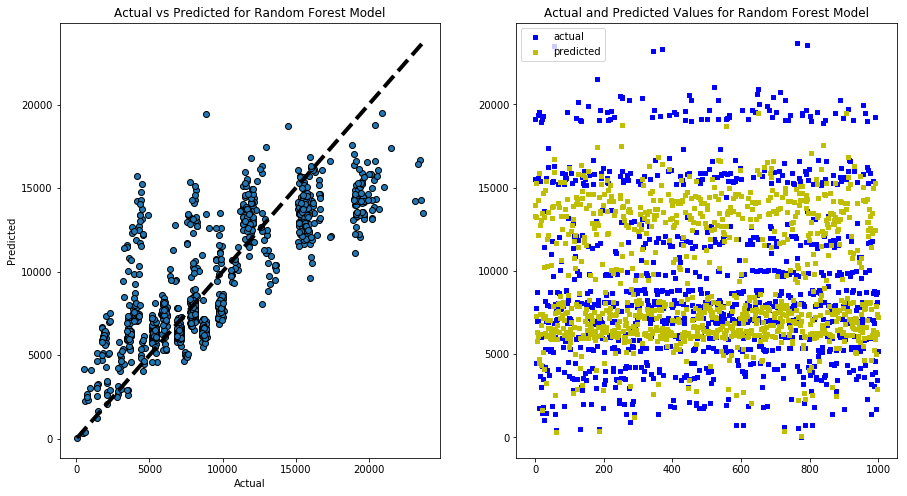

In [60]:
# lets do it again for random forest 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.set_title("Actual vs Predicted for Random Forest Model")
ax1.scatter(y_short, rf_short, edgecolors=(0, 0, 0))
ax1.plot([y_short.min(), y_short.max()], [y_short.min(), y_short.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')

ax2.set_title('Actual and Predicted Values for Random Forest Model')
ax2.scatter(np.arange(0,len(y_short)),y_short, s=10, c='b', marker="s", label='actual')
ax2.scatter(np.arange(0,len(y_short)),rf_short, s=10, c='y', marker="s", label='predicted')
ax2.legend(loc='upper left');
#plt.show()

##### Metrics

In [61]:
print('With sklearn...')
mse_rf_short = metrics.mean_squared_error(y_short,rf_short)
rmse_rf_short = np.sqrt(metrics.mean_squared_error(y_short,rf_short))
mae_rf_short = metrics.mean_absolute_error(y_short,rf_short)

print('MSE: ', mse_rf_short)
print('RMSE: ', rmse_rf_short)
print('MAE: ', mae_rf_short)

With sklearn...
MSE:  9365972.056643637
RMSE:  3060.387566411097
MAE:  2322.9031134083507


In [62]:
print('By hand...')
print('MSE: ', np.sum(np.square(np.abs(y_short - rf_short)))/len(y_short))
print('RMSE: ', np.sqrt(np.sum(np.square(np.abs(y_short - rf_short))/len(y_short))))
print('MAE: ',np.sum(np.abs(y_short - rf_short))/len(y_short))

By hand...
MSE:  9365972.056643637
RMSE:  3060.387566411097
MAE:  2322.9031134083507


##### MAE...

In [63]:
y_short.shape

(1000,)

In [64]:
y_short.head()

84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
Name: Purchase, dtype: int64

In [65]:
(y_short - rf_short)[:5]

84432      5850.500000
72724      1561.283524
197032      492.199701
353704     2190.088706
91198    -10779.200265
Name: Purchase, dtype: float64

In [66]:
# with MAE, we get the absolute values of the error
np.abs(y_short - rf_short)

84432      5850.500000
72724      1561.283524
197032      492.199701
353704     2190.088706
91198     10779.200265
263977      629.323927
340456     2986.719082
24094      5103.377892
157277      951.154634
531759     3457.413814
140977      190.554986
414535     3659.934055
504520     2918.443187
197149     1224.630724
241974     2549.734616
532759     2659.130954
490181     5869.649693
261405     1305.093467
345359      742.309459
127565      170.835307
396797     3181.580083
220547     5606.115268
361288     4625.177811
217635     3632.897381
397197     3300.677520
153385     3327.524136
380341     1824.980345
401168     3072.907371
325026     6669.192947
436361      965.264849
              ...     
244506     2335.177281
505624      763.449661
156809     1080.033964
155807     2064.138824
509891     1942.776048
291716      847.506279
343422     2122.679149
82263      2583.735731
384741     8213.005965
181802     3276.209948
538914     1685.989116
104799     1656.409044
308722     

In [67]:
# sum them up 
np.sum(np.abs(y_short - rf_short))

2322903.113408351

In [68]:
# then divide by the total number of predictions/actual values
np.sum(np.abs(y_short - rf_short))/len(y_short)

2322.9031134083507

##### RMSE....

In [69]:
# with RMSE, we get the absolute values of the error
np.abs(y_short - rf_short)

84432      5850.500000
72724      1561.283524
197032      492.199701
353704     2190.088706
91198     10779.200265
263977      629.323927
340456     2986.719082
24094      5103.377892
157277      951.154634
531759     3457.413814
140977      190.554986
414535     3659.934055
504520     2918.443187
197149     1224.630724
241974     2549.734616
532759     2659.130954
490181     5869.649693
261405     1305.093467
345359      742.309459
127565      170.835307
396797     3181.580083
220547     5606.115268
361288     4625.177811
217635     3632.897381
397197     3300.677520
153385     3327.524136
380341     1824.980345
401168     3072.907371
325026     6669.192947
436361      965.264849
              ...     
244506     2335.177281
505624      763.449661
156809     1080.033964
155807     2064.138824
509891     1942.776048
291716      847.506279
343422     2122.679149
82263      2583.735731
384741     8213.005965
181802     3276.209948
538914     1685.989116
104799     1656.409044
308722     

In [70]:
# then square them - giving even higher values to larger errors
np.square(np.abs(y_short - rf_short))

84432     3.422835e+07
72724     2.437606e+06
197032    2.422605e+05
353704    4.796489e+06
91198     1.161912e+08
263977    3.960486e+05
340456    8.920491e+06
24094     2.604447e+07
157277    9.046951e+05
531759    1.195371e+07
140977    3.631120e+04
414535    1.339512e+07
504520    8.517311e+06
197149    1.499720e+06
241974    6.501147e+06
532759    7.070977e+06
490181    3.445279e+07
261405    1.703269e+06
345359    5.510233e+05
127565    2.918470e+04
396797    1.012245e+07
220547    3.142853e+07
361288    2.139227e+07
217635    1.319794e+07
397197    1.089447e+07
153385    1.107242e+07
380341    3.330553e+06
401168    9.442760e+06
325026    4.447813e+07
436361    9.317362e+05
              ...     
244506    5.453053e+06
505624    5.828554e+05
156809    1.166473e+06
155807    4.260669e+06
509891    3.774379e+06
291716    7.182669e+05
343422    4.505767e+06
82263     6.675690e+06
384741    6.745347e+07
181802    1.073355e+07
538914    2.842559e+06
104799    2.743691e+06
308722    2

In [71]:
# then sum them
np.sum(np.square(np.abs(y_short - rf_short)))

9365972056.643637

In [72]:
# then divided by them by the total number of predictions/actual values
np.sum(np.square(np.abs(y_short - rf_short))/len(y_short))       

9365972.056643637

In [73]:
# then take the square root of that value
np.sqrt(np.sum(np.square(np.abs(y_short - rf_short))/len(y_short)))

3060.387566411097

#### 3.3 Build you own model

**EXERCISE 3.3:** Idenitfy another regressor model, instantiate it, fit it to the data, and use it to predict scores. If time, explore the parameters of the model, its attributes and methods.

---

**ANSWER:**
*Use cell below for answer* 

In [74]:
# code here to build your own model

# Using Lasso model
from sklearn.linear_model import Lasso

ls = Lasso(alpha=1)

In [75]:
ls_fit = ls.fit(X_train, y_train)

In [76]:
# Test score. Not a good score
ls_fit.score(X_test, y_test)

0.15023063547526694

In [77]:
ls_fit_y = ls_fit.predict(X_test)

In [78]:
msels = metrics.mean_squared_error(y_test, ls_fit_y)

In [79]:
msels

21416121.376658835

In [80]:
rmsels = np.sqrt(msels)
rmsels

4627.75554417677

In [81]:
ls_fit.sparse_coef_.toarray()

array([[ 4.62047053e+02,  1.02036886e+02,  9.94684510e+01,
         3.15929869e+02,  6.68213552e+00, -4.89260236e+01,
        -6.98146244e+03,  2.33897700e+02,  2.57963083e+03]])

In [82]:
ls_fit.coef_

array([ 4.62047053e+02,  1.02036886e+02,  9.94684510e+01,  3.15929869e+02,
        6.68213552e+00, -4.89260236e+01, -6.98146244e+03,  2.33897700e+02,
        2.57963083e+03])

### 4. Refine Model and Data
**AIM:** 
* Understand how we can tune the parameters of a model
* Understand that there are other options to split test and training data

---
**Hyperparameters**
* We can refine our model by tuning the hyperparameters, some of which can have a big effect on the performance. Think of hyperparameters as parameters that are not learned through training by the model but set by us prior to training. 
* Tuning can be done 'by hand', or using a `GridSearch` function to test multiple parameters during the same operation

**Cross-Validation Options**
* We can also refine our model performance by looking at how we train our models. 
* Section *2.2* referred to other ways of splitting the dataset into test and training sets. `k-fold Cross-Validation` is one way of doing this, and you can find out more about it [here](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html)

#### 4.1 Hyperparameter tuning using Grid Search

As a rule, increasing min or reducing max hyperparameters will regularize the model. The parameters tuned below are:
* n_estimators: this controls the number of trees in the forest
* criterion: this measures the quality of the split and can be either 'mae' or 'mse' 
* max_features: to test the maximum number of features that are evaluated for splitting at each node 

In [83]:
# create our random forest model
rf_gs = RandomForestRegressor()

# we need to specify the parameters we want to tune, as a dictionary 
parameters_rf = {'n_estimators': [10,50,100], 'criterion': ['mse','mae'], 'max_features': ['auto','sqrt','log2']}

In [84]:
# we need to define a scoring criteria for the gridsearch function, using the make_scorer function
from sklearn.metrics import make_scorer

# note our scoring function is MSE
scorer = make_scorer(metrics.mean_squared_error)

In [85]:
# import necessary library
from sklearn.model_selection import GridSearchCV

In [86]:
# we create our gridsearch object. using LOOCV 
grid_obj = GridSearchCV(rf_gs, parameters_rf, scoring=scorer, n_jobs=2, cv=5)
grid_obj

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'criterion': ['mse', 'mae'], 'n_estimators': [10, 50, 100], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error), verbose=0)

In [87]:
# create a subset of the data to do the grid searc
X_train_gs = X_train[:10000]
y_train_gs = y_train[:10000]

In [88]:
# fit the gridsearch object to our datatset
grid_fit = grid_obj.fit(X_train_gs, y_train_gs)

In [89]:
# look at the results:
print("GridSearch on Random Forest Model:")

# get scores of parameters tested and display as a dataframe
cv_results_df = pd.DataFrame(grid_fit.cv_results_) 
cv_results_df.head(5)

GridSearch on Random Forest Model:


/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sameer/anaconda3/lib/python

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.109205,0.006048,1.062446e+07,2.323836e+06,mse,auto,10,"{'criterion': 'mse', 'n_estimators': 10, 'max_...",9,1.051614e+07,...,1.076299e+07,2.289886e+06,1.033850e+07,2.348088e+06,1.078753e+07,2.291033e+06,0.002722,0.000137,171976.745359,32344.458609
1,0.429957,0.027964,1.005898e+07,1.934816e+06,mse,auto,50,"{'criterion': 'mse', 'n_estimators': 50, 'max_...",15,9.766214e+06,...,1.042923e+07,1.862063e+06,9.882250e+06,1.943825e+06,1.013494e+07,1.955100e+06,0.009842,0.004415,228185.486574,43388.024889
2,0.823485,0.059817,1.005791e+07,1.878972e+06,mse,auto,100,"{'criterion': 'mse', 'n_estimators': 100, 'max...",16,9.840488e+06,...,1.035848e+07,1.822930e+06,9.849703e+06,1.880908e+06,1.008882e+07,1.902220e+06,0.134707,0.011528,195334.753465,37160.393887
3,0.121014,0.005896,1.177649e+07,2.555115e+06,mse,sqrt,10,"{'criterion': 'mse', 'n_estimators': 10, 'max_...",1,1.188986e+07,...,1.210729e+07,2.492310e+06,1.133013e+07,2.578727e+06,1.202350e+07,2.598286e+06,0.010600,0.000188,297476.249840,57226.757989
4,0.225988,0.029732,1.091669e+07,2.031873e+06,mse,sqrt,50,"{'criterion': 'mse', 'n_estimators': 50, 'max_...",5,1.089885e+07,...,1.151658e+07,1.991131e+06,1.033759e+07,2.038456e+06,1.078511e+07,2.060200e+06,0.004799,0.004769,381938.476338,32521.957810


In [90]:
print('Scores of Parameters tested:\n') 

# get scores of parameters tested and display as a dataframe
scores_df = pd.DataFrame(cv_results_df[['params', 'rank_test_score']]) 
display(scores_df)

Scores of Parameters tested:



,params,rank_test_score
0,"{'criterion': 'mse', 'n_estimators': 10, 'max_...",9
1,"{'criterion': 'mse', 'n_estimators': 50, 'max_...",15
2,"{'criterion': 'mse', 'n_estimators': 100, 'max...",16
3,"{'criterion': 'mse', 'n_estimators': 10, 'max_...",1
4,"{'criterion': 'mse', 'n_estimators': 50, 'max_...",5
5,"{'criterion': 'mse', 'n_estimators': 100, 'max...",7
6,"{'criterion': 'mse', 'n_estimators': 10, 'max_...",2
7,"{'criterion': 'mse', 'n_estimators': 50, 'max_...",6
8,"{'criterion': 'mse', 'n_estimators': 100, 'max...",8
9,"{'criterion': 'mae', 'n_estimators': 10, 'max_...",10


In [91]:
print(scores_df.loc[6])

params             {'criterion': 'mse', 'n_estimators': 10, 'max_...
rank_test_score                                                    2
Name: 6, dtype: object


In [92]:
# Get the estimator, predictions and metric score from best model
best_model = grid_fit.best_estimator_
best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [93]:
# get predictions using the new model
predictions_best = best_model.predict(X_test)

In [94]:
# get a score by comparing our predict against actual
score_cv = np.sqrt(metrics.mean_squared_error(y_test,predictions_best))

# print out the score 
print('RMSE score for {} is:'.format(best_model.__class__.__name__),np.round((score_cv), decimals=2))

RMSE score for RandomForestRegressor is: 3428.12


**EXERCISE 4.1:**  Apply grid search to model you built at **3.3**, remembering to amend the dictionary to match the parameters taken by your model



---



**ANSWER:**
*Use code cell below*


#### 4.2 Cross-Validation using K-Fold 

**EXERCISE 4.2 (OPTIONAL):** Look up K-Fold Cross-Validation and implement it on our dataset and run the best performing model to see if the score is improved. Take a look at [this](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html) article for more information.

---

**ANSWER:**




#### Using Lasso model and Grid Search with K-Fold Cross-Validation

In [95]:
alpha = [0.1,1,10,100]
pos = [True, False]

params = dict(alpha = alpha , positive = pos)
params

{'alpha': [0.1, 1, 10, 100], 'positive': [True, False]}

In [96]:
# Using multiple metrics
from sklearn.metrics import r2_score, mean_squared_error
scoring = {'R2': make_scorer(r2_score), 'MSE': make_scorer(mean_squared_error)}
gridsearchCV_lasso = GridSearchCV(Lasso(), param_grid = params, cv = 5, n_jobs=2, 
                                  scoring = scoring, pre_dispatch = '1*n_jobs', 
                                 refit = 'MSE', return_train_score = True)

In [97]:
gridsearchCV_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'positive': [True, False], 'alpha': [0.1, 1, 10, 100]},
       pre_dispatch='1*n_jobs', refit='MSE', return_train_score=True,
       scoring={'R2': make_scorer(r2_score), 'MSE': make_scorer(mean_squared_error)},
       verbose=0)

In [98]:
gridsearchCV_lasso.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=True, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
gridsearchCV_lasso.best_estimator_.get_params()

{'alpha': 100,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': True,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [100]:
gsCV_df = pd.DataFrame(gridsearchCV_lasso.cv_results_)
gsCV_df.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_MSE', 'mean_test_R2',
       'mean_train_MSE', 'mean_train_R2', 'param_alpha', 'param_positive',
       'params', 'rank_test_MSE', 'rank_test_R2', 'split0_test_MSE',
       'split0_test_R2', 'split0_train_MSE', 'split0_train_R2',
       'split1_test_MSE', 'split1_test_R2', 'split1_train_MSE',
       'split1_train_R2', 'split2_test_MSE', 'split2_test_R2',
       'split2_train_MSE', 'split2_train_R2', 'split3_test_MSE',
       'split3_test_R2', 'split3_train_MSE', 'split3_train_R2',
       'split4_test_MSE', 'split4_test_R2', 'split4_train_MSE',
       'split4_train_R2', 'std_fit_time', 'std_score_time', 'std_test_MSE',
       'std_test_R2', 'std_train_MSE', 'std_train_R2'],
      dtype='object')

In [101]:
gsCV_df

,mean_fit_time,mean_score_time,mean_test_MSE,mean_test_R2,mean_train_MSE,mean_train_R2,param_alpha,param_positive,params,rank_test_MSE,...,split4_test_MSE,split4_test_R2,split4_train_MSE,split4_train_R2,std_fit_time,std_score_time,std_test_MSE,std_test_R2,std_train_MSE,std_train_R2
0,0.118069,0.010227,2.298713e+07,0.089381,2.298647e+07,0.089410,0.1,True,"{'positive': True, 'alpha': 0.1}",4,...,2.325503e+07,0.087623,2.291954e+07,0.089850,0.038790,0.001325,167551.317043,0.001049,41869.707822,0.000263
1,0.126568,0.009418,2.138113e+07,0.153006,2.138035e+07,0.153035,0.1,False,"{'positive': False, 'alpha': 0.1}",8,...,2.165192e+07,0.150519,2.131268e+07,0.153659,0.008041,0.002180,175306.885879,0.001862,43829.226516,0.000467
2,0.109099,0.011783,2.298716e+07,0.089379,2.298650e+07,0.089409,1,True,"{'positive': True, 'alpha': 1}",3,...,2.325516e+07,0.087618,2.291957e+07,0.089849,0.008082,0.003022,167602.556209,0.001049,41869.706085,0.000263
3,0.130284,0.010409,2.138118e+07,0.153004,2.138041e+07,0.153033,1,False,"{'positive': False, 'alpha': 1}",7,...,2.165207e+07,0.150513,2.131273e+07,0.153657,0.014083,0.002800,175316.483625,0.001859,43829.224749,0.000467
4,0.097635,0.010068,2.299008e+07,0.089264,2.298944e+07,0.089292,10,True,"{'positive': True, 'alpha': 10}",2,...,2.325903e+07,0.087466,2.292250e+07,0.089732,0.016814,0.002113,168098.199012,0.001052,41873.006749,0.000263
5,0.132812,0.011948,2.138628e+07,0.152802,2.138556e+07,0.152829,10,False,"{'positive': False, 'alpha': 10}",6,...,2.165812e+07,0.150276,2.131790e+07,0.153452,0.011856,0.002805,175427.690283,0.001831,43810.929878,0.000465
6,0.084774,0.009071,2.315534e+07,0.082717,2.315500e+07,0.082734,100,True,"{'positive': True, 'alpha': 100}",1,...,2.342539e+07,0.080939,2.308790e+07,0.083164,0.012462,0.002389,169172.200875,0.001002,41709.630907,0.000253
7,0.105808,0.009123,2.172224e+07,0.139492,2.172189e+07,0.139505,100,False,"{'positive': False, 'alpha': 100}",5,...,2.199200e+07,0.137176,2.165198e+07,0.140185,0.022238,0.002259,172187.120652,0.001503,44911.730404,0.000505


In [102]:
gsCV_df[['params', 'rank_test_MSE', 'rank_test_R2']]
# This shows that a good R2 doesn't necessary mean a good fit. MSE is a better metric.

,params,rank_test_MSE,rank_test_R2
0,"{'positive': True, 'alpha': 0.1}",4,5
1,"{'positive': False, 'alpha': 0.1}",8,1
2,"{'positive': True, 'alpha': 1}",3,6
3,"{'positive': False, 'alpha': 1}",7,2
4,"{'positive': True, 'alpha': 10}",2,7
5,"{'positive': False, 'alpha': 10}",6,3
6,"{'positive': True, 'alpha': 100}",1,8
7,"{'positive': False, 'alpha': 100}",5,4


In [103]:
best_lasso = Lasso()

In [104]:
# Setting the best estimator parameters of Grid Search as the parameters of a new Lasso object
best_lasso.set_params(**gridsearchCV_lasso.best_estimator_.get_params())

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=True, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
best_lasso.get_params()

{'alpha': 100,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': True,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [106]:
lasso_fit = best_lasso.fit(X_train, y_train)

In [107]:
# R2 score on test data
lasso_fit.score(X_test, y_test)

0.0822817110313614

In [108]:
# MSE of test data
# Obviously Lasso is not a good model
mean_squared_error(y_test, lasso_fit.predict(X_test))

23128588.86966852

In [109]:
# MSE of training data
mean_squared_error(y_train, lasso_fit.predict(X_train))

23155031.47475021

##### Nested Cross-Validation can be used to compare between different ML algorithms

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
scoring = {'R2': make_scorer(r2_score), 'MSE': make_scorer(mean_squared_error)}
nestedCV_lasso = GridSearchCV(Lasso(), param_grid = params, cv = 2, n_jobs=2, 
                                  scoring = scoring, pre_dispatch = '1*n_jobs', 
                                 refit = 'MSE', return_train_score = True)



scores = cross_val_score(nestedCV_lasso, X_train, y_train, 
                         scoring = make_scorer(mean_squared_error), cv = 5, 
                        n_jobs=1, pre_dispatch = '1*n_jobs')

In [112]:
scores

array([22930262.40035845, 23240711.21763403, 23133327.36426387,
       23047006.92068644, 23425390.69091681])

In [113]:
# Comparable to the above best score from GridSearch
scores.mean()

23155339.718771916

### 5. Wrapping up
* We have covered: 
  * What Machine Learning is
  * What approach to take to solving machine learning problems
  * Loading and processing data
  * Splitting data into traing and testing sets
* Ideas for additional exercises, *which we can cover via slack if there is demand*:
    * Build a *pipeline* to manage all the steps outlined above
    * Use *Ensemble* methods to combine different ML models 
    * Undertake *Exploratory Data Analysis* to understand the dataset better
    * Use *Feature Engineering* to provide additional inputs in to the model

## Part 2: Deep Learning 

**Structure of Part 2**
1. Introduction to Deep Learning and Keras
2. Build DL model, train and evaluate the model 
3. Refine model 

### 1. Introduction to Deep Learning and Keras
**AIM:** 
* To cover the *basics* of Deep Learning (notes largely taken from 'Deep Learning wtih Python' by Francois Chollet)
* To suggest further reading to explore the topic further  
* To introduce Keras 

---

**Deep Learning** 
* Deep Learning is a mathematical framework for learning representations from data.
* The *deep* refers to the number of layers within a model: the layers puts an emphasis on learning successive layers of increasingly meaningful representations from the data. 

![alt text](https://i.stack.imgur.com/iHW2o.jpg)

* A Deep Learning model will include the following aspects (which we can specify in order to find the optimal model):
  
  * *Number of layers:* The core building block of neural networks is the layer, a data-processing module that you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them. The specification of what a layer does to its input data is stored in the layer’s weights, which in essence are a bunch of numbers. In this context, learning means finding a set of values for the weights of all layers in a network, such that the network will correctly map example inputs to their associated targets.

  * *The objective loss function:* How the network will be able to measure its performance on the training data - how far this output is from what you expected - and thus how it will be able to steer itself in the right direction.The loss function takes the predictions of the network and the true target and computes a distance score, capturing how well the network has done on this specific example. 
  
  * *The type of optimizer:* The mechanism through which the network will update itself based on the data it sees and its loss function.An optimizer will adjust the value of the weights a little, in a direction that will lower the loss score for the current example, using the Backpropagation algorithm.
  
  * *How we train the model on the data:* Initially, the weights of the network are assigned random values, so the network merely implements a series of random transformations. Its output is far from what it should ideally be, and the loss score is accordingly very high. But with every example the network processes, the weights are adjusted a little in the correct direction, and the loss score decreases. This is the training loop, which, repeated a sufficient number of times (typically tens of iterations over thousands of examples), yields weight values that minimize the loss function. A network with a minimal loss is one for which the outputs are as close as they can be to the targets: a trained network. Once again, it’s a simple mechanism that, once scaled, ends up looking like magic.
  
  
* In addition, we also need to think about the type of *activation functions* we use. These define the ouput of node within a layer of the model, and helps the Deep Learning model move from linear representation of the data to non-linearity. 
* It is considered an art to get the right model, something which requires experimentation with the elements of the model covered above.  
* Deep Learning uses linear algebra (matrix multiplication) to model the inputs to the outputs, and caculus (back propogation) to determine the error and update the model during each round of training. This is not covered here.  A free online course in linear algebra for deep learning is [here](http://www.fast.ai/2017/07/17/num-lin-alg/) and for calculus is [here](http://explained.ai/matrix-calculus/index.html?utm_medium=email&utm_source=topic+optin&utm_campaign=awareness&utm_content=20180709+ai+nl&mkt_tok=eyJpIjoiT1RBeE5qTmpaREZtWWpreCIsInQiOiJ1dithMG5IcDBsa0p3YjRVWFVGenpmOG5iQ0syM0M0Q3hMT3d3TUdMWkMwME1odElRTUxoRldmem5rRlhyK2d1YUROeGU0M0VlQ1VyeVJyY2o5RDFyWWFDdGRSWDVCcVp4aTJ3ajM1eDUyVUY4ZVFvZFVvRVduYSs1NmladnRBZSJ9). 
* Many different types of deep learning models, e.g. convolutional neural networks, which have been shown to be better at computer vision tasks, and recurrent neural networks, which are used in NLP tasks. We will be building a feedforward deep learning model, which is basic but sufficient for the problem we are trying to solve. 
* See this series of [articles](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721) and [videos](https://www.youtube.com/watch?v=aircAruvnKk) for a good introduction to Deep Learning (and Machine Learning more generally). The [fast.ai](http://course.fast.ai) Deep Learning Course would be a good next step for anyone interested in doing more deep learning, and this [book](http://www.deeplearningbook.org) is the reference book for the subject (and is free).


**Keras**
* There are a number of Deep Learning libraries available, such as `Tensorflow` and `PyTorch`. We will be using `Keras`, which is a high level Deep Learning library. `Keras` can use other Deep Learning libraries as its `backend`, meaning we can use the same `Keras` interface to access these different libraries. For this tutorial we will be using `Tensorflow` as the backend.
* `Keras` makes it straightforward to build our model, and we will cover operations to add layers, specify our activation functions, optimizer, loss functions and metrics, tailor our training and add regularization to our models. 
* The best places to learn more about `Keras` include the [Keras Blog](https://blog.keras.io) and the book [Deep Learning with Python](https://www.amazon.co.uk/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_1?ie=UTF8&qid=1537089319&sr=8-1&keywords=deep+learning+with+python), written by the head of the `Keras` project..

### 2. Build Model 
**AIM:**
* To build our first Deep Learning Model and get a feel for `Keras` 

---

* In order to build a model, we need to:
  * Define the model (its layers, activation functions, and number of 'neurons')
  * Compile the model, by specifying the loss, optimizer and metrics we will use to update the model during training 
  * Fit the model to the data, and specify how we will train it 
  

### 2.1 Define Model 

In [114]:
# import statements 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


**EXERCISE 2.1:**  
a) Specify the input dimension for the first layer, and the output size for the final layer, then run the code to define the model and see the summary of the model

b) Go through below and comment line by line what you think is happening. Look at the [documentation](https://keras.io/getting-started/sequential-model-guide/) to understand this better, and see what other parameters are available to us. See [this](https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc) too for more information. 

---

**ANSWER:**

In [115]:
# see Exercise 2.1: What input dimensions are required? 
input_dim = X_train.shape[1]
# see Exercise 2.1: What output size do we need to specify? 
output_size = 1

In [116]:
# Define model
# Sequential is a simple, linearly stacked model - see links for further information on this 
model = Sequential()
# This is out first layer, and the only time we need to specify the input dimensions of a layer
model.add(Dense(100, input_dim=input_dim, activation= "relu"))
# This is our second, 'hidden' layer. What other parameters are available to use when adding layers?  
model.add(Dense(50, activation= "relu"))
# This is our output layer
model.add(Dense(output_size))
# We can print the model summary here 
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


#### 2.2 Compile and Fit Model

In [117]:
# Compile model
# here we have a number of options for each parameter
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [118]:
  ## before fitting the model, let's create a validation set

# remind ourselves of the training set shape
print(X_train.shape)
print(y_train.shape)

(385047, 9)
(385047,)


In [119]:
# partition off X_train in X_train and X_val
X_train = X_train[:3000000]
X_val = X_train[300000:]

# and do the same for y_train 
y_train = y_train[:3000000]
y_val = y_train[300000:]

In [120]:
len(y_val)

85047

In [121]:
epochs = 1
# each epoch takes around 1 minute. Run with 1 epoch to get a feel for what is happening, Evaluate Model (2.3) then increase to 5 to see how things change
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

Train on 385047 samples, validate on 85047 samples
Epoch 1/1
385047/385047 [==============================] - 12s 31us/step - loss: 24917018.9816 - mean_squared_error: 24917018.9816 - val_loss: 21093024.0888 - val_mean_squared_error: 21093024.0888


In [122]:
epochs = 5
# Evaluate Model (2.3) then increase to 5 to see how things change
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

Train on 385047 samples, validate on 85047 samples
Epoch 1/5
385047/385047 [==============================] - 11s 29us/step - loss: 19516469.5159 - mean_squared_error: 19516469.5159 - val_loss: 18559020.1073 - val_mean_squared_error: 18559020.1073
Epoch 2/5
385047/385047 [==============================] - 11s 29us/step - loss: 17877157.0056 - mean_squared_error: 17877157.0056 - val_loss: 17852316.5996 - val_mean_squared_error: 17852316.5996
Epoch 3/5
385047/385047 [==============================] - 11s 29us/step - loss: 17716033.7287 - mean_squared_error: 17716033.7287 - val_loss: 17830091.4399 - val_mean_squared_error: 17830091.4399
Epoch 4/5
385047/385047 [==============================] - 11s 29us/step - loss: 17703073.7081 - mean_squared_error: 17703073.7081 - val_loss: 17827865.1956 - val_mean_squared_error: 17827865.1956
Epoch 5/5
385047/385047 [==============================] - 11s 29us/step - loss: 17701198.0922 - mean_squared_error: 17701198.0922 - val_loss: 17864291.5598 - va

#### The MSE leveled off after 3 epochs or iterations

In [123]:
# Fit Model
# epochs defines how many times we will train the model on the data
#epochs = 10
# each epoch takes around 1 minute. Run with 1 epoch to get a feel for what is happening, Evaluate Model (2.3) then increase to 5 to see how things change
#history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

In [124]:
# model.fit returns a history object, which contains a history dictionary about everything that happened during training 
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'mean_squared_error', 'val_mean_squared_error', 'loss'])

In [125]:
# for example we can access the validation loss like this
history_dict['val_loss']

[18559020.10725834,
 17852316.599597868,
 17830091.439933214,
 17827865.195621245,
 17864291.55977283]

In [126]:
history_dict

{'loss': [19516469.515947405,
  17877157.005552568,
  17716033.72866689,
  17703073.70813433,
  17701198.092248477],
 'mean_squared_error': [19516469.515947405,
  17877157.005552568,
  17716033.72866689,
  17703073.70813433,
  17701198.092248477],
 'val_loss': [18559020.10725834,
  17852316.599597868,
  17830091.439933214,
  17827865.195621245,
  17864291.55977283],
 'val_mean_squared_error': [18559020.10725834,
  17852316.599597868,
  17830091.439933214,
  17827865.195621245,
  17864291.55977283]}

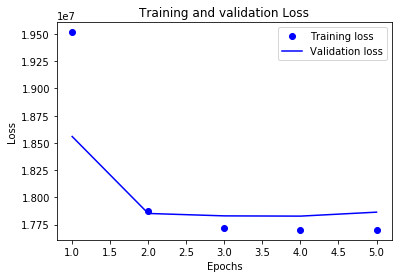

In [127]:
# and use it to plot out the training performance
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['mean_squared_error']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 2.3 Evaluate Model

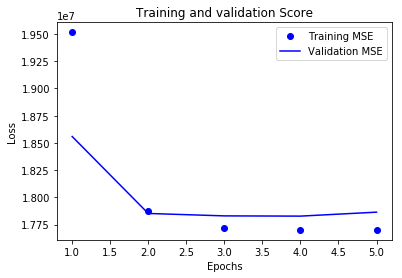

In [128]:
# and evaluate the model using the scores
plt.clf()                                      
mse_values = history_dict['mean_squared_error']
val_mse_values = history_dict['val_mean_squared_error']

plt.plot(epochs, mse_values, 'bo', label='Training MSE')
plt.plot(epochs, val_mse_values, 'b', label='Validation MSE')
plt.title('Training and validation Score')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [129]:
# we can evaluate in a similar way to the machine learning models 
from sklearn import metrics
predict = model.predict(X_test)
score_nn = np.sqrt(metrics.mean_squared_error(y_test,predict))

print('RMSE score for {} is:'.format(model.__class__.__name__),np.round((score_nn), decimals=2))

RMSE score for Sequential is: 4215.86


**EXERCISE 2.3:**  What are the reasons that this model might not be as good as the machine learning models we used on Day 1?

---

**ANSWER:** The RMSE is higher compared to the ML models used earlier. 




### 3. Refine Model
**AIM:** 
To understand the options for building models and refining how compile and fit models. 

---
**Defining Models**
  * We can change the number of *'neurons'* that are used at each layer of the model. This will increase or decrease the number of parameters in the model, and may result in the model over- or under-fitting.  
  * We can add or remove *layers* within the model. Again, this will increase or decrease the number of parameters in the model, and may result in the model over- or under-fitting.  
  * We can change the *activation functions* at each layer of the model, including (where appropriate), the output layer. Some activation functions are more suited to certain problem types, and the ones specified here are appropriate for a regression problem. See the [documention](https://keras.io/activations/) for more information.
  
**Regularizing Models**
* *Weight regularization* constrains the complexity by forcing a network's weights to take only small values, which makes the distribution of weight values more regular. It’s done by adding to the loss function of the network a cost associated with having large weights. This cost will force the optimizer function to update the weights in a direction that reduces the larger weights, and can be calculated by:
   * L1 regularization— The cost added is proportional to the absolute value of the weight coefficients.
   * L2 regularization— The cost added is proportional to the square of the value of the weight coefficients. See [here](https://keras.io/regularizers/) for more detail.
* *Dropout* results in some neurons being omitted from each training epoch, so that the model doesn't become reliant on certain 'neural pathways.' For each training instance, a node has a user defined probabilty of not being activated. We can specify dropout when we build our model, see the documentation and feel free to incorporate it in *Exercise 3.1*. See [here](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf) for more detail and [here](https://keras.io/layers/core/) for how to code it, as well as another example [here](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/).
  
**Compiling Models**
  * We can choose a range of *Optimisation*, *Loss* and *Metric* functions when compiling our models. Like activation functions, some are more suited to certain types of problems than others. See the documentation for more on [Optimizers](https://keras.io/optimizers/), [Loss](https://keras.io/losses/), and [Metrics](https://keras.io/metrics/). 
  * We can do a `Grid Search` of hyperparameters as we did in Day 1, see [here](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/) for a guide.
  
  
**Refine training/fitting**
  * The `.fit()` function contains a number of parameters that can be used to modify how we train our models. See the [documentation](https://keras.io/models/sequential/) for more details.
  * For example, it is possible at this stage to partition a validation dataset from the training data, and to evaluate the loss and model metric at each epoch on this validation set.
  * We can amend the number of epochs we train the model on, and also specify the number of steps (batches) per epoch, with each batch leading to a gradient update.
  * We can also specify [Callbacks](https://keras.io/callbacks/), which are used to provide more information about how the model is trained. See [here](https://machinelearningmastery.com/check-point-deep-learning-models-keras/) for a worked example

**EXERCISE 3.1:**  Develop a new model (you can use the previous model as a basis for your new one), using one or more of the 

---

**ANSWER:** *Use code cell below*

In [130]:
## TODO: Build new DL Model here
model_1 = Sequential()
model_1.add(Dense(256,input_dim=input_dim, activation='relu')) 
model_1.add(Dense(128,activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dense(output_size))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2560      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 43,777
Trainable params: 43,777
Non-trainable params: 0
_________________________________________________________________


In [131]:
## TODO: Compile new model here 
# here we have a number of options for each parameter
model_1.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [132]:
# set-up a callback here if you wish
# from keras.callbacks import TensorBoard. Doesnt work with jupyter notebooks

In [133]:
from keras.callbacks import ReduceLROnPlateau

In [134]:
callback = ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 5, 
                            verbose = 0, cooldown = 3)

In [135]:
## TODO: Train new Model here
epochs = 15
history_1 = model_1.fit(X_train, y_train, epochs=epochs,validation_data=(X_val,y_val), 
                        callbacks=[callback])   # delete callbacks argument if not used

Train on 385047 samples, validate on 85047 samples
Epoch 1/15
385047/385047 [==============================] - 19s 49us/step - loss: 20240649.8990 - mean_squared_error: 20240649.8990 - val_loss: 17999665.9508 - val_mean_squared_error: 17999665.9508
Epoch 2/15
385047/385047 [==============================] - 18s 47us/step - loss: 18129427.2770 - mean_squared_error: 18129427.2770 - val_loss: 17884299.7063 - val_mean_squared_error: 17884299.7063
Epoch 3/15
385047/385047 [==============================] - 18s 47us/step - loss: 18024538.3204 - mean_squared_error: 18024538.3204 - val_loss: 17614045.2805 - val_mean_squared_error: 17614045.2805
Epoch 4/15
385047/385047 [==============================] - 18s 48us/step - loss: 17627780.0688 - mean_squared_error: 17627780.0688 - val_loss: 17080943.7153 - val_mean_squared_error: 17080943.7153
Epoch 5/15
385047/385047 [==============================] - 21s 56us/step - loss: 16763110.4381 - mean_squared_error: 16763110.4381 - val_loss: 15919803.6800

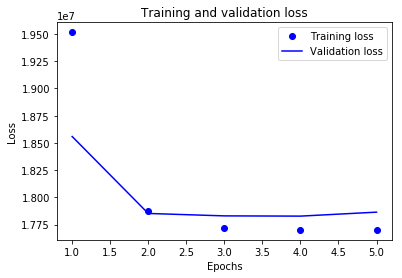

In [136]:
# and use it to plot out the training performance
history_dict_1 = history.history
loss_values = history_dict_1['loss']
val_loss_values = history_dict_1['val_loss']

epochs = range(1, len(history_dict_1['mean_squared_error']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [137]:
## TODO: Evaluate your model
predict = model_1.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(y_test,predict))
print (score)

3260.905595857597


**EXERCISE 3.2:**  Choose one aspect of the training to train by researching the above points further then passing the compiled model from *3.2* to the 

---

**ANSWER:** *Use code cell below*

In [138]:
## TODO: Build new training approach

# Using same parameters as model_1
model_2 = Sequential()
model_2.add(Dense(256,input_dim=input_dim, activation='relu')) 
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(output_size))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               2560      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 43,777
Trainable params: 43,777
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compiling
model_2.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [140]:
# changing batch_size for updating the learning rate and also using the above defined callback
epochs = 15
history_2 = model_2.fit(X_train, y_train, batch_size=64, epochs=epochs,validation_data=(X_val,y_val), 
                        callbacks=[callback])

Train on 385047 samples, validate on 85047 samples
Epoch 1/15
385047/385047 [==============================] - 14s 35us/step - loss: 21856010.2366 - mean_squared_error: 21856010.2366 - val_loss: 17854392.8221 - val_mean_squared_error: 17854392.8221
Epoch 2/15
385047/385047 [==============================] - 13s 33us/step - loss: 18080294.3263 - mean_squared_error: 18080294.3263 - val_loss: 17859948.5813 - val_mean_squared_error: 17859948.5813
Epoch 3/15
385047/385047 [==============================] - 17s 43us/step - loss: 18077654.4117 - mean_squared_error: 18077654.4117 - val_loss: 17905193.9478 - val_mean_squared_error: 17905193.9478
Epoch 4/15
385047/385047 [==============================] - 15s 39us/step - loss: 18056771.7101 - mean_squared_error: 18056771.7101 - val_loss: 17770449.3358 - val_mean_squared_error: 17770449.3358
Epoch 5/15
385047/385047 [==============================] - 15s 40us/step - loss: 18009051.9770 - mean_squared_error: 18009051.9770 - val_loss: 17919963.5835

In [141]:
## TODO: Evaluate your model

predict = model_2.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(y_test,predict))
print (score)

3258.4118060646797


#### Increasing the batch size only marginally increased the RMSE but was faster compared to model_1

### 4. Wrapping up
* We have covered: 
  * What Deep Learning is
  * Building, compiling and fitting a model
  * Refining how we build model, regularize and train our model
* Ideas for additional exercises, *which we can cover via slack if there is demand*:
    * Adding additional regularization methods
    * Experimenting with adding model layers, changing the number of neurons in the model 
    